In [ ]:
'''
1. Try to reproduce the graphs given in Figure 2.2 on page 23 of the textbook
2. Specifically, implement the -greedy method on the 10-armed bandit testbed, for different values of .
3. Ensure that you have labelled the graphs correctly.
'''

'''
Label the 
graphs clearly, with axes labels, parameter values, question numbers etc.
Ensure that the code is adequately commented. Also turn in a short write-up of your observations from the
experiments and answers to all the questions asked below.
'''

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
'''
The action values, q ∗ (a), a = 1, . . . , 10, were selected according to a normal (Gaussian) distribution
with mean 0 and variance 1. Then, when a learning method applied to that problem selected action A t at time step t,
the actual reward, R_t , was selected from a normal distribution with mean q ∗ (A_t ) and variance 1.
'''

In [3]:
'''
Initialization of expectation of arms
'''
q_a = np.zeros([10,2])
mu, sigma = 1, 1
for i in range(10):
    q_a[i][0] = np.random.normal(mu, sigma)
    q_a[i][1] = 0
print(q_a)
n = np.argmax(q_a, axis=0)
print(n[0])


[[ 0.17408078  0.        ]
 [ 0.02463817  0.        ]
 [-0.88593302  0.        ]
 [ 3.38865888  0.        ]
 [ 1.00719168  0.        ]
 [-0.67318364  0.        ]
 [ 1.74141322  0.        ]
 [ 2.43652236  0.        ]
 [ 0.09433201  0.        ]
 [ 1.60471526  0.        ]]
3


In [ ]:
'''
R_t is the reward obtained by pulling arm x at time t.
q_a[x] is the expected value of arm x at time t.
'''
R_t = np.random.normal(q_a[x],1)

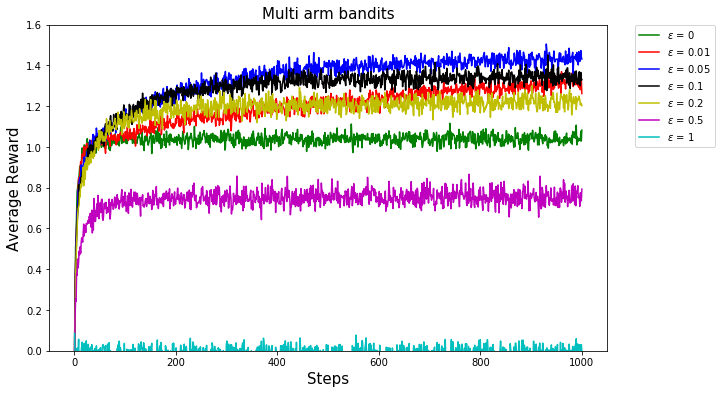

In [54]:
'''
For plotting average reward in case of epsilon-greedy method.
'''

fig = plt.figure(figsize=(10,6))

x = np.zeros([steps])
for i in range(1,steps+1):
    x[i-1] = i

# Plotting the data
colors = ['g', 'r', 'b', 'k', 'y','m', 'c']
for i in range(len(avg_reward)):
    plt.plot(x, avg_reward[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

# Labelling the graph
plt.xlabel('Steps', fontsize = 15)
plt.ylabel('Average Reward', fontsize = 15)
plt.title('Multi arm bandits', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 1.6)


plt.show()

0


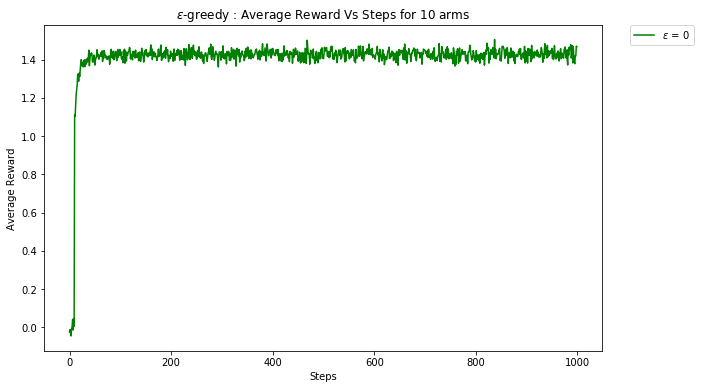

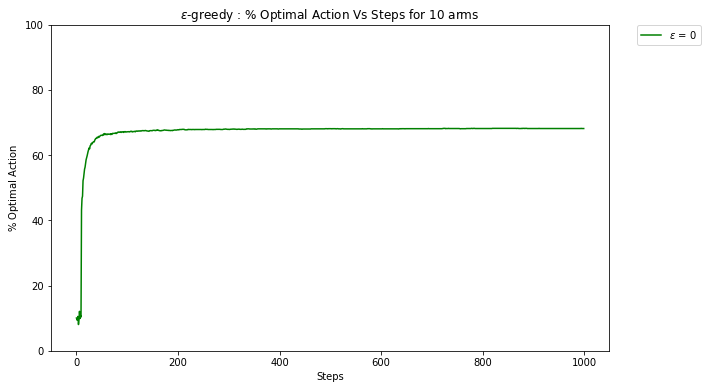

In [5]:
import numpy as np
from matplotlib import pyplot as plt


def Epsilon_greedy(k, epsilon, steps, runs, true_values):
    '''
    k = the number of arms
    epsilon = the value of epsilon
    steps = the number of times we pull the arm in each bandit problem
    runs = the number of bandit problems
    true_values = the actual rewards of each arm
    '''
    
    opt_arms = np.argmax(true_values,axis=1)
    
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    print(epsilon)
    for i in range(runs):
        '''
        Initialize the expected values of each action to zero 
        '''
        Q = np.zeros([k])
        N = np.zeros([k])
            
        '''
        Pull the arms 2000 times by following epsilon-greedy approach
        '''
       
        
        for j in range(steps):
            
            if j<k:
                reward = np.random.normal(true_values[i][j], 1)
                N[j] += 1
                Q[j] = Q[j] + (reward - Q[j])/N[j]
                
                if opt_arms[i] == j:
                    opt[j]+=1
            else :
                num = np.random.uniform(0,1)


                if num<epsilon:
                    arm = np.random.randint(0,k)   # pick a random arm
                else:
                    arm = np.argmax(Q, axis = 0)    # get the max expectation 

                reward = np.random.normal(true_values[i][arm],1)
                N[arm] += 1
                Q[arm] = Q[arm] + (reward - Q[arm])/N[arm]
                
                if opt_arms[i] == arm:
                    opt[j] += 1

            avg[j] += reward # To store rewards obtained on every step of every run


    avg = np.divide(avg,runs)  # average of reward at each step over all bandit problems
    opt = np.divide(opt, runs/100)  # percentage of the times that optimal action is chosen at a time step over all bandit problems
    
    return avg,opt


def plot_all(avg_reward, opt_percent, epsilons):


    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)


    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']
    for i in range(len(avg_reward)):
        fig1.plot(range(steps), avg_reward[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

    for i in range(len(opt_percent)):
        fig2.plot(range(steps), opt_percent[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

    fig1.title.set_text(r'$\epsilon$-greedy : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
#     fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    plt.show()


if __name__ == '__main__':
    
    steps = 1000
    runs = 2000
#     epsilons = [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1]
    epsilons = [0]
    k = 10
    mean = 0
    std_dev = 1

    avg_reward = []  # store for all epsilons
    opt_arm = []     # store for all epsilons
    
    true_values = np.random.normal(mean, std_dev, (runs, k )) 
    
    for i in range(len(epsilons)):
        avg, opt = Epsilon_greedy(k, epsilons[i], steps, runs, true_values)
        avg_reward.append(avg)
        opt_arm.append(opt)
    
    plot_all(avg_reward, opt_arm, epsilons)

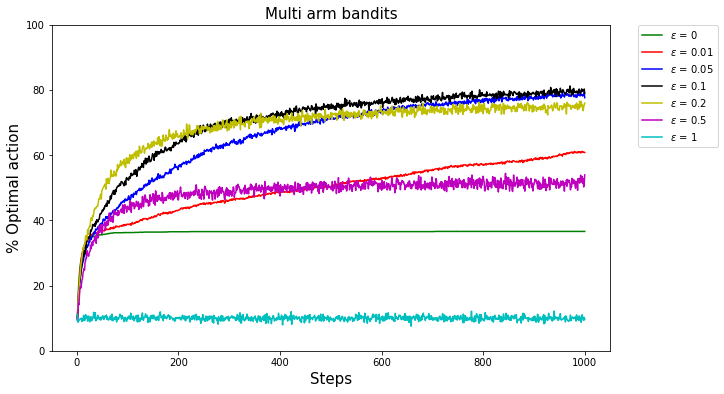

In [55]:
'''
For percentage of times optimal arm is selected
'''
fig = plt.figure(figsize=(10,6))

x = np.zeros([steps])
for i in range(1,steps+1):
    x[i-1] = i

# Plotting the data
colors = ['g', 'r', 'b', 'k', 'y','m', 'c']
for i in range(len(opt_arm)):
    plt.plot(x, opt_arm[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

# Labelling the graph
plt.xlabel('Steps', fontsize = 15)
plt.ylabel('% Optimal action', fontsize = 15)
plt.title('Multi arm bandits', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 100)


plt.show()


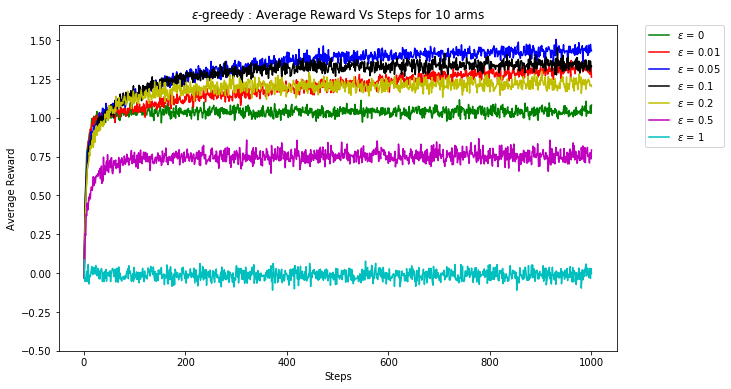

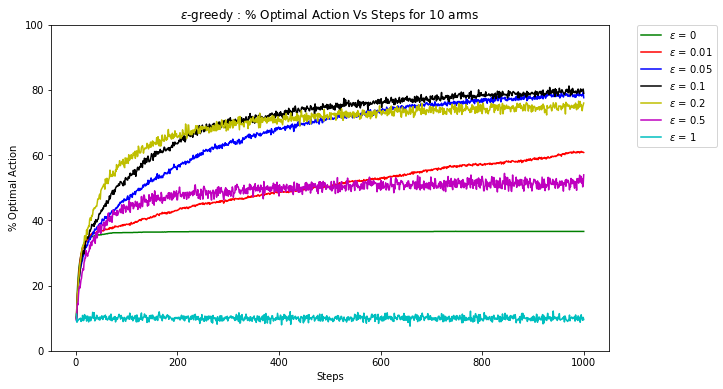

In [64]:
fig1=plt.figure(figsize=(10,6)).add_subplot(111)
fig2=plt.figure(figsize=(10,6)).add_subplot(111)

colors = ['g', 'r', 'b', 'k', 'y','m', 'c']
for i in range(len(avg_reward)):
    fig1.plot(x, avg_reward[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

for i in range(len(opt_arm)):
    fig2.plot(x, opt_arm[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

fig1.title.set_text(r'$\epsilon$-greedy : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.set_ylim(-0.5,1.6)
fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

x = np.zeros([steps])
for i in range(1,steps+1):
    x[i-1] = i
    




plt.show()

In [113]:
x = np.array([[0,1,2,3],
              [0,3,5,7]])
n = np.argmax(x, axis=1)
n

array([3, 3])

In [38]:
true_values = np.random.normal(mean, std_dev, (2, 10 )) 
op = np.argmax(true_values,1)
print(true_values)
print(op)

[[ 0.40301661  1.41359826 -0.25641856  0.43858967  0.24745121  0.13647878
   1.68330905 -1.03683098  0.56626203  0.41755945]
 [-0.66775047 -0.83445017 -0.89292136 -0.21107148 -1.11743901  0.23852153
   0.1716131  -0.54714378 -1.3856825  -0.98030801]]
[6 5]


In [76]:
def plot_all(avg_reward, opt_percent, epsilons):



    fig1=plt.figure()
    fig2=plt.figure()

    fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
    fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])

    x = np.zeros([len(avg_reward[0])])
    for i in range(1,steps+1):
        x[i-1] = i

    colors = ['g', 'r', 'b', 'k', 'y','m', 'c']
    for i in range(len(avg_reward)):
        fig1.plot(x, avg_reward[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

    for i in range(len(opt_percent)):
        fig2.plot(x, opt_percent[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

    fig1.title.set_text(r'$\epsilon$-greedy : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()

0
0.01
0.1


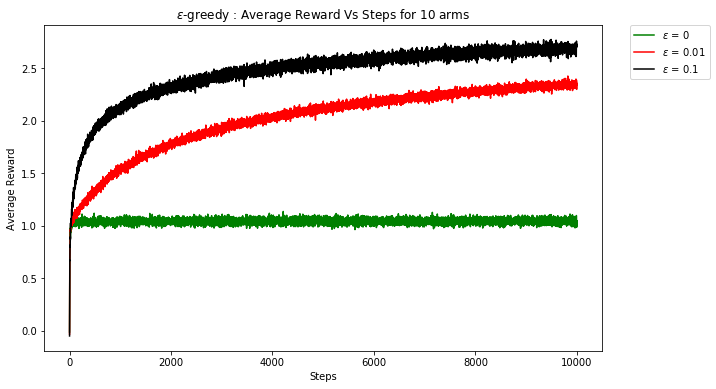

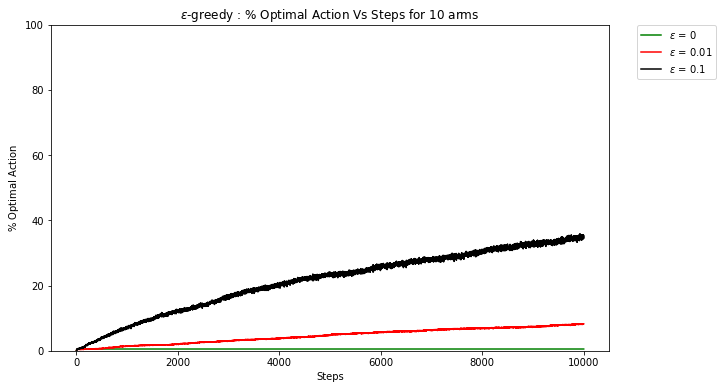

In [3]:

import numpy as np
from matplotlib import pyplot as plt


def Epsilon_greedy(k, epsilon, steps, runs, true_values):
    '''
    k = the number of arms
    epsilon = the value of epsilon
    steps = the number of times we pull the arm in each bandit problem
    runs = the number of bandit problems
    true_values = the actual rewards of each arm
    '''
    
    opt_arms = np.argmax(true_values,axis=1)
    
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    print(epsilon)
    for i in range(runs):
        '''
        Initialize the expected values of each action to zero 
        '''
        Q = np.zeros([k])
        N = np.zeros([k])
            
        '''
        Pull the arms 2000 times by following epsilon-greedy approach
        '''
        
        for j in range(steps):
            num = np.random.uniform(0,1)


            if num<epsilon:
                arm = np.random.randint(0,k)   # pick a random arm
            else:
                arm = np.argmax(Q, axis = 0)    # get the max expectation 

            reward = np.random.normal(true_values[i][arm],1)
            N[arm] += 1
            Q[arm] = Q[arm] + (reward - Q[arm])/N[arm]
            if opt_arms[i] == arm:
                opt[j] += 1

            avg[j] += reward # To store rewards obtained on every step of every run

    # print(exp_val)
    # print(mx, rn)
    avg = np.divide(avg,runs)  # average of reward at each step over all bandit problems
    opt = np.divide(opt, runs/100)  # percentage of the times that optimal action is chosen at a time step over all bandit problems
    
    return avg,opt


def plot_all(avg_reward, opt_percent, epsilons):


    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)


    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']
    for i in range(len(avg_reward)):
        fig1.plot(range(steps), avg_reward[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

    for i in range(len(opt_percent)):
        fig2.plot(range(steps), opt_percent[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

    fig1.title.set_text(r'$\epsilon$-greedy : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
#     fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#     fig1 = fig1.get_figure()
#     fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()


if __name__ == '__main__':
    
    steps = 10000
    runs = 2000
#     epsilons = [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1]
    epsilons = [0, 0.01, 0.1]
    k = 1000
    mean = 0
    std_dev = 1

    avg_reward = []  # store for all epsilons
    opt_arm = []     # store for all epsilons
    
    true_values = np.random.normal(mean, std_dev, (runs, k )) 
    
    for i in range(len(epsilons)):
        avg, opt = Epsilon_greedy(k, epsilons[i], steps, runs, true_values)
        avg_reward.append(avg)
        opt_arm.append(opt)
    
    plot_all(avg_reward, opt_arm, epsilons)

In [67]:
len(avg_reward[0])

1000

In [69]:
a = np.zeros([10])
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

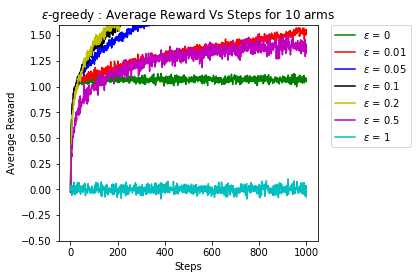

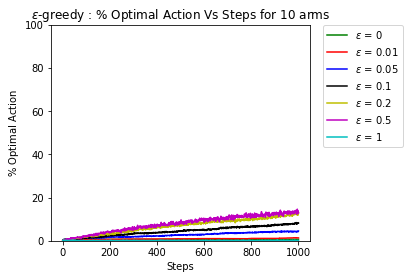

In [77]:
if __name__ == '__main__':
    
    steps = 1000
    runs = 2000
    epsilons = [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1]
    k = 1000
    mean = 0
    std_dev = 1

    avg_reward = []  # store for all epsilons
    opt_arm = []     # store for all epsilons
    
    true_values = np.random.normal(mean, std_dev, (runs, k )) 
    
    for i in range(len(epsilons)):
        avg, opt = Epsilon_greedy(k, epsilons[i], steps, runs, true_values)
        avg_reward.append(avg)
        opt_arm.append(opt)
    
    plot_all(avg_reward, opt_arm, epsilons)

In [10]:
n = np.random.normal(0, 1, (10,1))
n

array([[ 0.05326903],
       [-0.99512106],
       [-0.21420519],
       [ 0.26248747],
       [-1.47293945],
       [-1.01969883],
       [ 0.46842511],
       [-0.80257985],
       [ 0.44949926],
       [ 1.43035457]])